![tinhatben](tinhatben_svg.png)

# Mahalanobis Distance
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

In [1]:
# Imports
from tinhatbenbranding import TINHATBEN_GRAY, TINHATBEN_YELLOW, add_tinhatbendotcom
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

## Define a data set

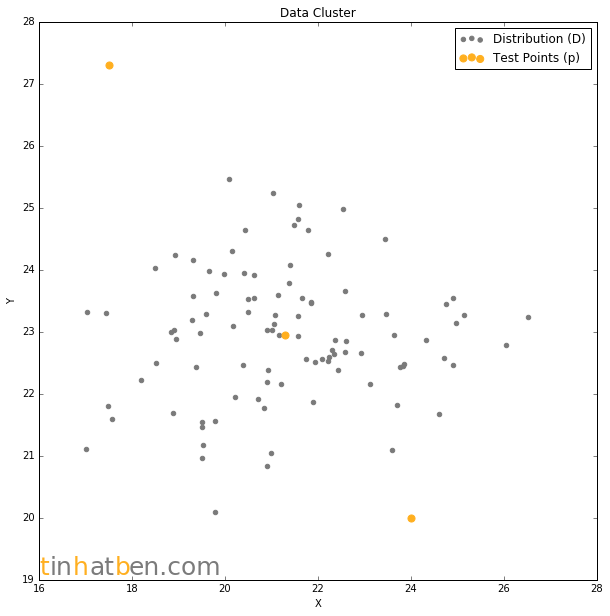

In [2]:
D = np.load("D.npy")
n = D.shape[0]
fig = plt.figure()
ax = fig.add_subplot(111)

# We want to find the Mahalanobis Distance for point p
p1 = np.array([17.5, 27.3])
p2 = np.mean(D, axis=0)
p3 = np.array([24, 20])
d_fig = ax.scatter(D[:,0], D[:,1], c=TINHATBEN_GRAY, edgecolor=TINHATBEN_GRAY)
p_fig = ax.scatter(x=[p1[0], p2[0], p3[0]], y=[p1[1], p2[1], p3[1]], 
                   c=TINHATBEN_YELLOW, edgecolor=TINHATBEN_YELLOW, s=50)
ax.set_title("Data Cluster")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend([d_fig, p_fig], ["Distribution (D)", "Test Points (p)"])
add_tinhatbendotcom(ax, (0,0))
plt.savefig("distribution.png", dpi=300)

## Characterise the data set
Determine the mean and covariance of the data.  For more information on calculating these statistics refer to [this blog post](https://tinhatben.com/2016/04/13/principal-component-analysis/)

In [3]:
mu = np.mean(D, axis=0) # The mean of the data
D_minus_mu = (D - mu).T # Take the transpose because we want a the cov for x, y as a 2 x 2 matrix
# If we didnt't take the transpose we would get a 100 x 100 covariance matrix
# S = [[cov(x, x), cov(x, y)], [cov(x, y), cov(y, y)]]
S = np.dot(D_minus_mu, D_minus_mu.T) / n # Covariance matrix
print("mu = %s" % mu.__str__())
print("S = %s" % S.__str__())

mu = [ 21.28588312  22.9497843 ]
S = [[ 4.08731989  0.15236826]
 [ 0.15236826  1.08333636]]


## Calculate the Mahalanobis Distance.
The Mahalanobis distance is the distance of a point $p$ from a distribution $D$.  It is an extension of the concept that the standard deviation is the average distance of a data point within the distribution from the mean, considering for multidimensional data.  I. To calculate the Mahalanobis Distance we use the following:

$$ d_m = \sqrt{(p - \mu_D)S^{-1}(p - \mu_D)^T} $$

Where:

* $d_m$ is the Mahalanobis distance
* $p$ is the point to find the distance for
* $\mu_d$ is the mean of the distribution D
* $S^{-1}$ is the inverse of the covariance matrix

As you can see the Mahalanobis Distance is zero if the test point is at the mean of the distribution


In [4]:
S_inv = np.linalg.inv(S)
p1_minus_mu = p1 - mu
p1_minus_mu_S = np.dot(p1_minus_mu, S_inv)
d_m = np.sqrt(np.dot(p1_minus_mu, p1_minus_mu.T))
print("#" * 50)
print("Point p1")
print("p1 = %s" % p1.__str__())
print("D_mu = %s" % mu.__str__())
print("S = %s\n" % S.__str__())
print("Mahalanobis distance = %0.5f" % d_m)
print("#" * 50)
print("Point p2")
###################################################
p2_minus_mu = p2 - mu
p2_minus_mu_S = np.dot(p2_minus_mu, S_inv)
d_m = np.sqrt(np.dot(p2_minus_mu, p2_minus_mu.T))
print("p2 = %s" % p2.__str__())
print("D_mu = %s" % mu.__str__())
print("S = %s\n" % S.__str__())
print("Mahalanobis distance = %0.5f" % d_m)
###################################################
p3_minus_mu = p3 - mu
p3_minus_mu_S = np.dot(p3_minus_mu, S_inv)
d_m = np.sqrt(np.dot(p3_minus_mu, p3_minus_mu.T))
print("#" * 50)
print("Point p3")
print("p1 = %s" % p3.__str__())
print("D_mu = %s" % mu.__str__())
print("S = %s\n" % S.__str__())
print("Mahalanobis distance = %0.5f" % d_m)

##################################################
Point p1
p1 = [ 17.5  27.3]
D_mu = [ 21.28588312  22.9497843 ]
S = [[ 4.08731989  0.15236826]
 [ 0.15236826  1.08333636]]

Mahalanobis distance = 5.76691
##################################################
Point p2
p2 = [ 21.28588312  22.9497843 ]
D_mu = [ 21.28588312  22.9497843 ]
S = [[ 4.08731989  0.15236826]
 [ 0.15236826  1.08333636]]

Mahalanobis distance = 0.00000
##################################################
Point p3
p1 = [24 20]
D_mu = [ 21.28588312  22.9497843 ]
S = [[ 4.08731989  0.15236826]
 [ 0.15236826  1.08333636]]

Mahalanobis distance = 4.00845
